# Correlation analysis

The aim of this notebook is to find whether there is any correlation between racial

diversity of the main cast of a film and the overall sentiment observed in tweets associated.


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Metrics

In order to do so, we have calculated several metrics for each film:

* _Diversity score_: proportion of non-white actor in starring cast
* _Sentiment score_: $ \sum_{i=1}^{n}\sum_{j=1}^{3}a_j \cdot p_{ij} $, where n is the number of tweets, $p_i$ is the probability or "score" given to each possible class (negative, neutral and positive) by the model and $a_{j}$ is a weight for each cattegory (-1, 0 and 1)  



In [15]:
# Put your absolute pat to the project here
project_path = '/media/nior/e29444da-b389-49ca-8650-307f72cc153a/NIOR/niorProject/DITW_project-master'

df = pd.read_csv(os.path.join(project_path, 'data/movies_with_scores.csv'), sep=";",
                    encoding='latin-1')

df

,id,film_name,n_nonwhite,n_actors,diversity_score,perc_negative,perc_neutral,perc_positive,neg_score_avg,neutr_score_avg,pos_score_avg,sentiment_score,n_tweets
0,1,The Little Mermaid (2023 film),5,9,0.556,3.39,46.67,49.94,0.07,0.43,0.50,0.4361,10000.0
1,2,Ghost in the Shell (2017 film),1,6,0.167,14.90,47.54,37.56,0.14,0.46,0.39,0.2543,631.0
2,3,The Witcher (TV series),4,14,0.286,5.70,57.40,36.90,0.07,0.53,0.40,0.3294,10000.0
3,4,Bridgerton,6,27,0.222,10.68,47.08,42.24,0.11,0.45,0.44,0.3278,10000.0
4,5,Inception,1,9,0.111,14.40,37.16,48.44,0.15,0.36,0.49,0.3409,10000.0
5,6,The Wolf of Wall Street (2013 film),0,9,0.000,14.90,30.10,55.00,0.15,0.30,0.56,0.4104,10000.0
6,7,Mad Max: Fury Road,0,9,0.000,7.04,46.03,46.93,0.08,0.44,0.48,0.4088,10000.0


Text(0, 0.5, 'Film Name')

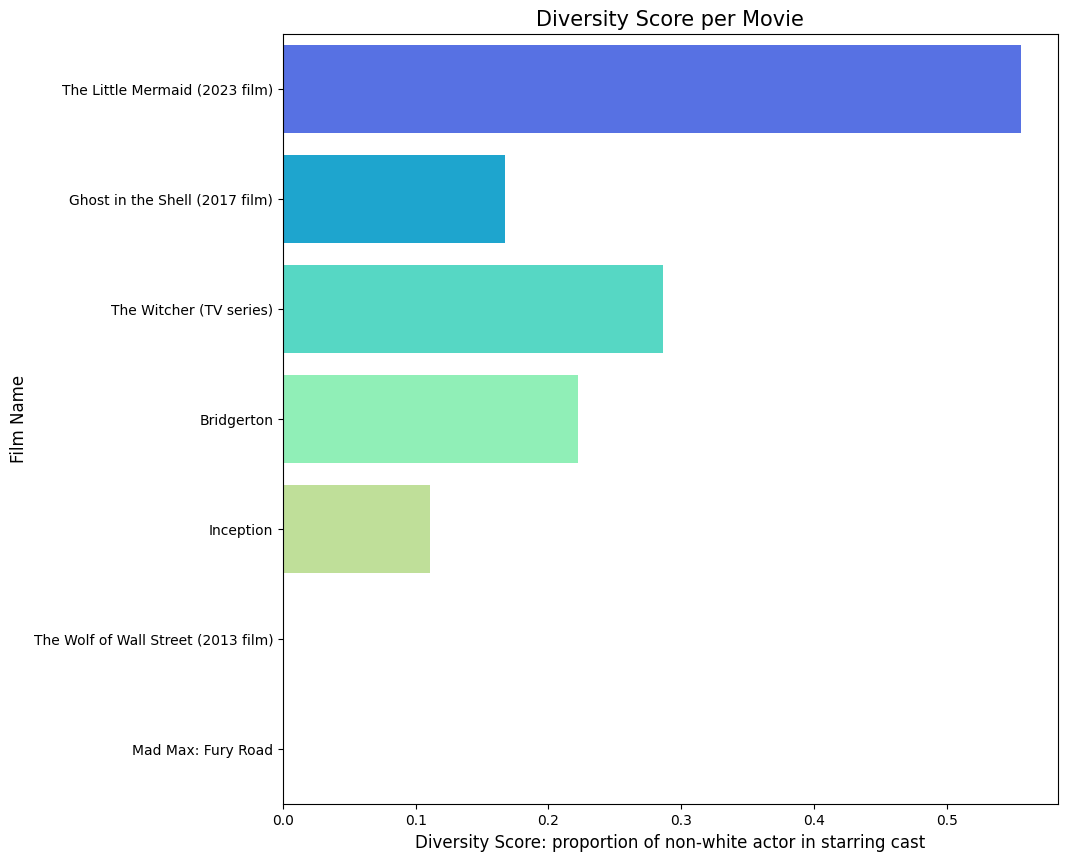

In [58]:
plt.figure(figsize = (10,10))

fig = sns.barplot(y='film_name', x='diversity_score', data = df, palette='rainbow')
plt.title("Diversity Score per Movie", fontsize=15) 
plt.xlabel('Diversity Score: proportion of non-white actor in starring cast', fontsize=12)
plt.ylabel('Film Name', fontsize=12)

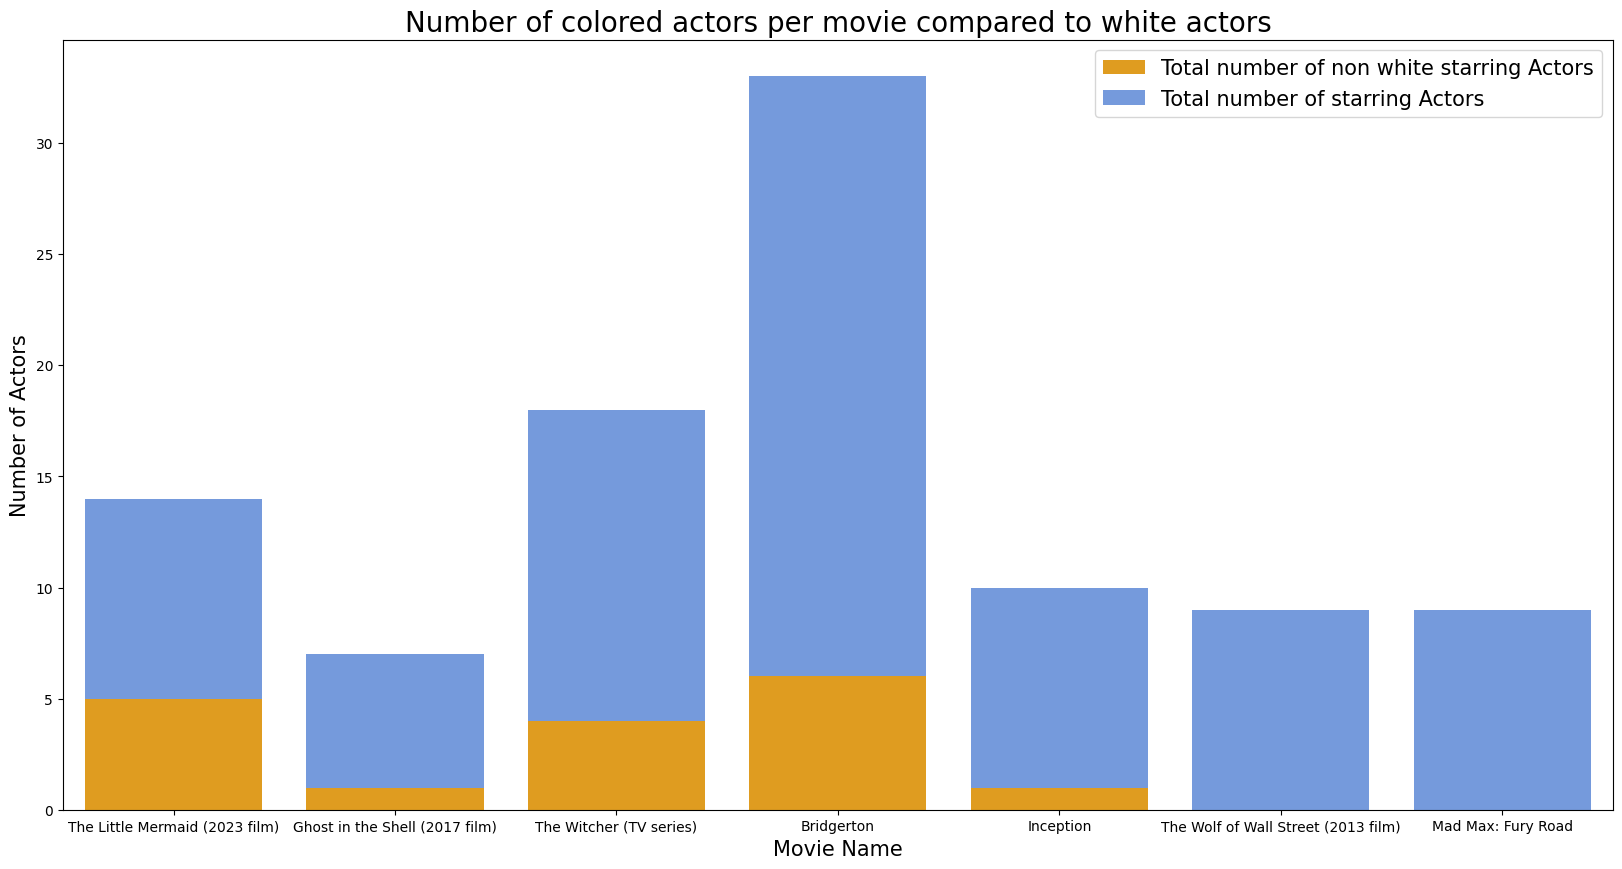

In [57]:
plt.figure(figsize = (20,10))

ax = sns.barplot(data=df, x="film_name", y=df["n_nonwhite"], color='orange', label="Total number of non white starring Actors")
sns.barplot(data=df, x="film_name", y=df["n_actors"], bottom=df["n_nonwhite"], color='cornflowerblue',
            label="Total number of starring Actors", ax=ax)
ax.legend(fontsize=15)
plt.title("Number of colored actors per movie compared to white actors", fontsize=20)
plt.xlabel('Movie Name', fontsize=15)
plt.ylabel('Number of Actors', fontsize=15)
plt.show()

## Visual inspection

### Sentiment Score vs Diversity Score

In [4]:
fig = px.scatter(df, x="sentiment_score", y="diversity_score", hover_data=['film_name'])
fig.show()

## Numerical inspection

### Covariance

In [5]:
covariance = np.cov(df["sentiment_score"], df["diversity_score"])
print(covariance)

[[0.00403362 0.00149961]
 [0.00149961 0.0371909 ]]


### Pearson’s Correlation


In [6]:
p_corr, _ = pearsonr(df["sentiment_score"], df["diversity_score"])
print('Pearsons correlation: %.3f' % p_corr)

Pearsons correlation: 0.122


### Spearmans correlation

In [7]:
s_corr, _ = spearmanr(df["sentiment_score"], df["diversity_score"])
print('Spearmans correlation: %.3f' % s_corr)

Spearmans correlation: -0.090
